# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USM)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

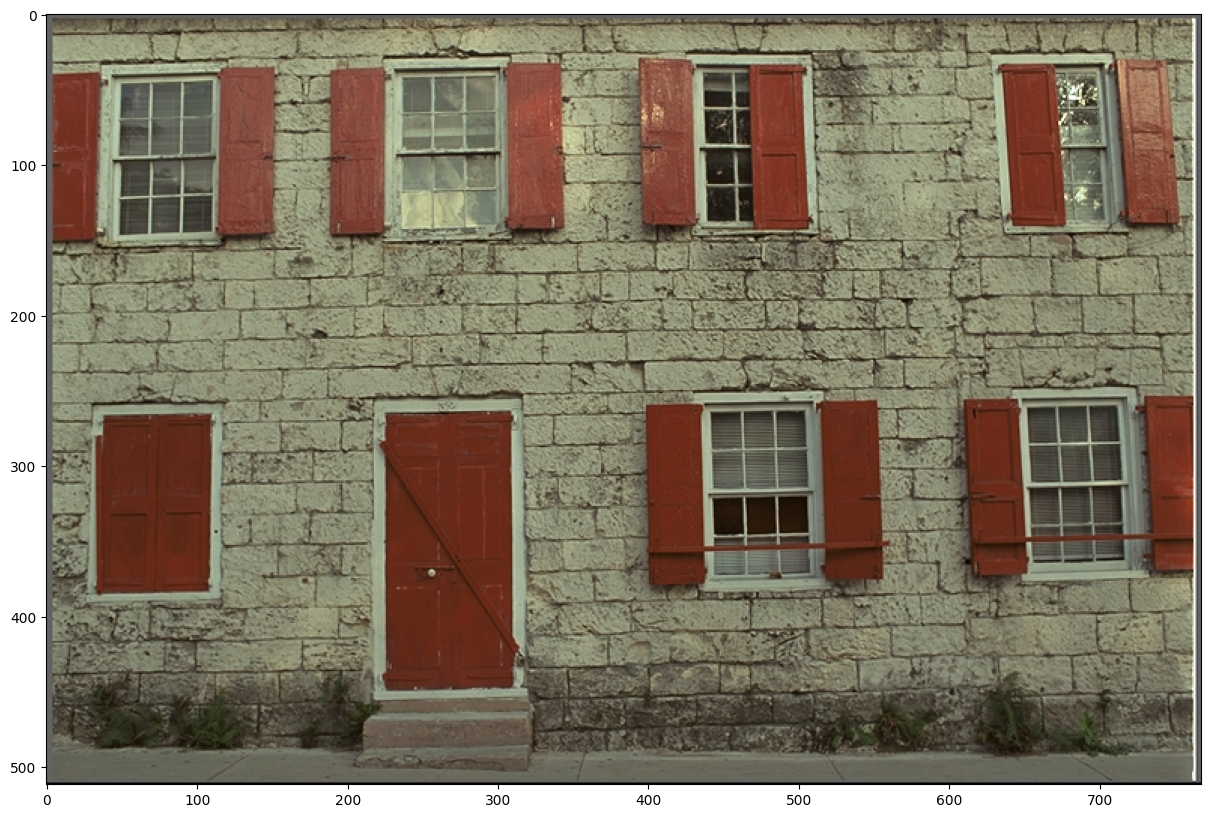

In [2]:
img = cv2.imread('data/kodim01.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

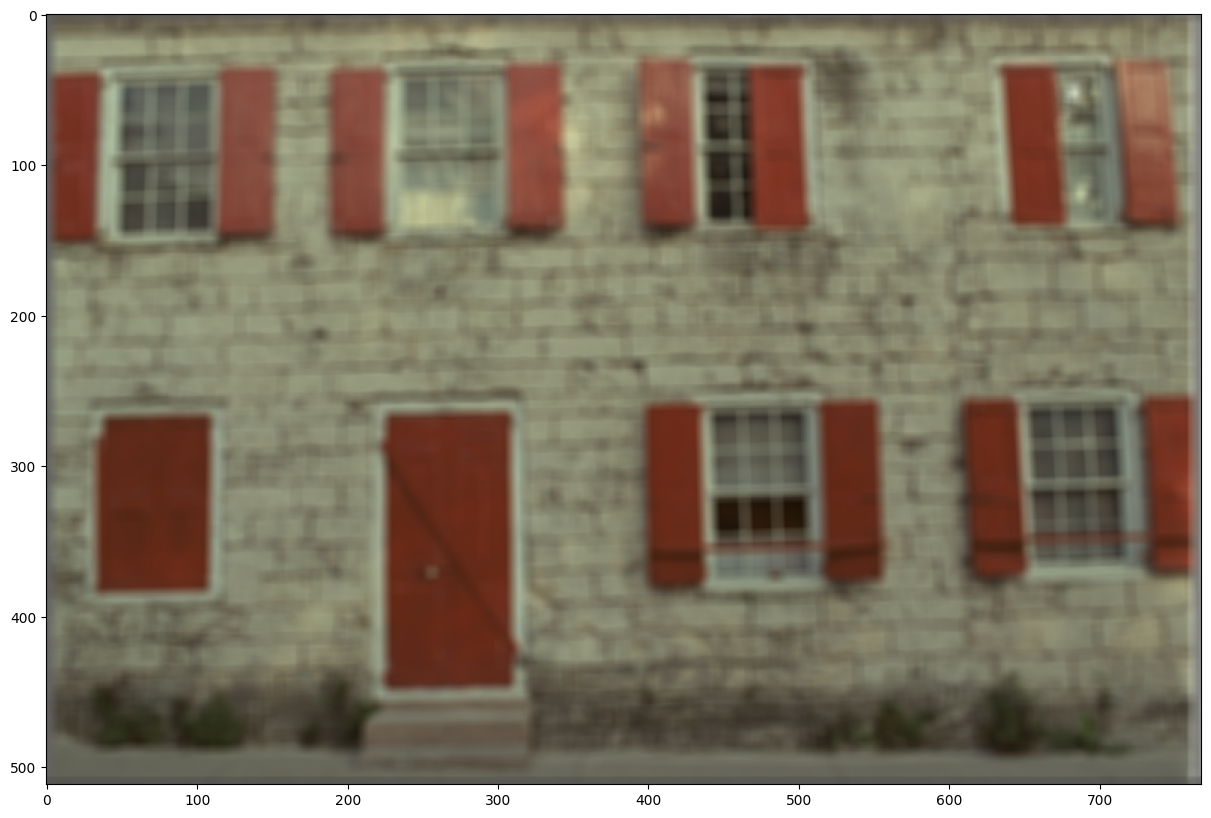

In [3]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, (9, 9), 5)
plt.imshow(unsharp)

In [4]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.

# casting to float first, change the range to [0,1] to be able to plot it
img = img.astype(np.float32) / 255.0
unsharp = unsharp.astype(np.float32) / 255.0

diff = img - unsharp

# to get the idea about the values in the diff
print(f"{np.max(diff) = }")
print(f"{np.mean(diff) = }")
print(f"{np.min(diff) = }")

np.max(diff) = np.float32(0.6352941)
np.mean(diff) = np.float32(-0.0004352705)
np.min(diff) = np.float32(-0.54901963)


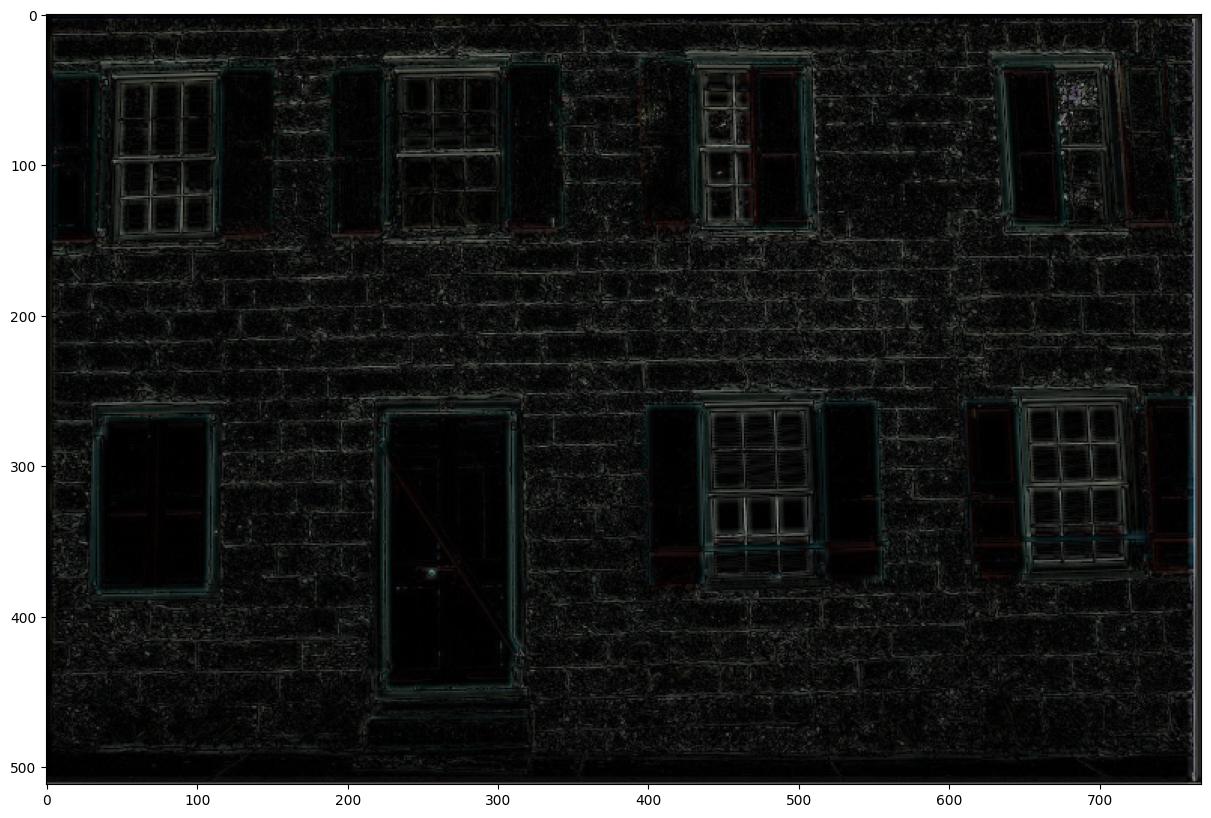

In [5]:
# this is only to show the difference, this is not used in the calculations
diff_clipped_abs = np.clip(np.abs(diff), 0, 1)
plt.imshow(diff_clipped_abs)

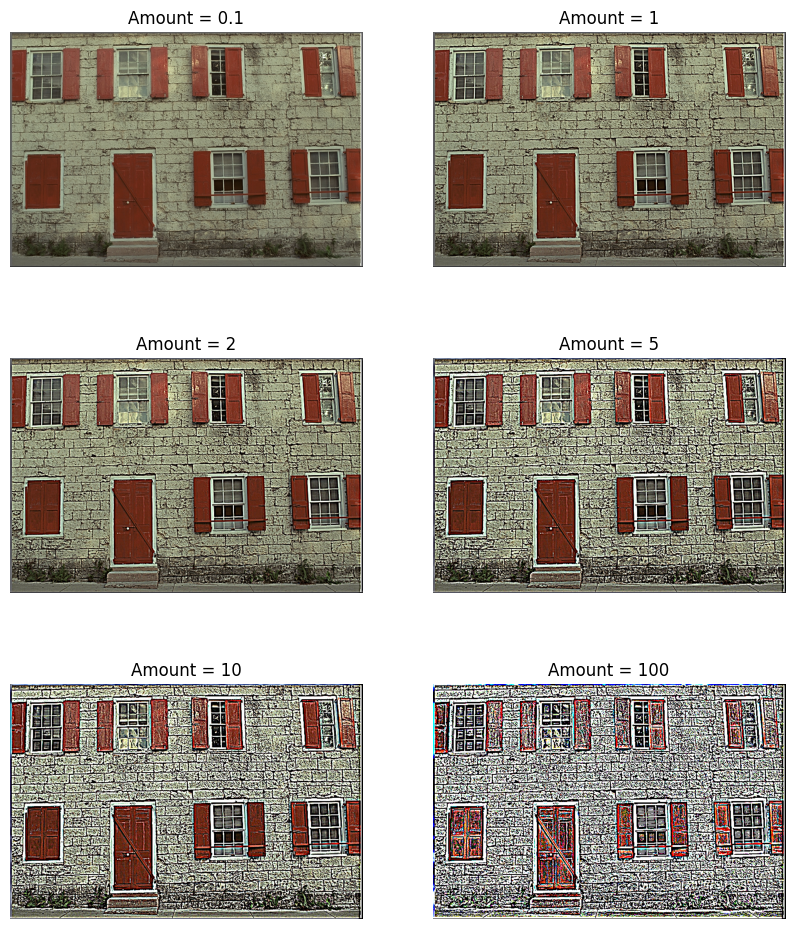

In [6]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.

# Define the different amounts for sharpening
amounts = [0.1, 1, 2, 5, 10, 100]  # Six different sharpening amounts
plt.figure(figsize=(10, 12)) 

for i, amount in enumerate(amounts):
    sharpened = img + diff * amount  
    
    # Clip the values to ensure they remain in the valid range [0, 1]
    sharpened = np.clip(sharpened, 0, 1)
    
    plt.subplot(3, 2, i + 1)
    
    plt.imshow(sharpened)
    plt.title(f'Amount = {amount}')
    plt.axis('off')  

From the images above I personally like amount=1 and amount=5

Amount=1 gives significant increase in contrast, while the picture still looks "natural"

Amount=1 already "feels off", but it has great contrast with minimum artifacts.

### Questions
* What is a good (reasonable) value for the `amount` parameter?
 * What happens if it is too small?
 * What happens if it is too large?

### Answers
* According to my search, resonable value lie somewhere in 0.1-5 range
 * Too small value will have almost no effect on the image
 * Too big value will introduce too many artifacts (noise), degrading image quality